### Working question - how is SuperFoodsMax tracking on revenue currently?

In [27]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [55]:
%matplotlib inline

In [28]:
df = pd.read_csv("dataset_2017_2020_cleanJP.csv")

In [29]:
#check column headings
df.columns

Index(['Unnamed: 0', 'customer_id', 'product_id', 'basket_id', 'loyalty',
       'household_type', 'age_band', 'department', 'brand', 'commodity',
       'store', 'transaction_date', 'price', 'days_since_first', 't_date',
       'month', 'quarter', 'demo_child'],
      dtype='object')

In [30]:
#check data type
df.dtypes

Unnamed: 0            int64
customer_id           int64
product_id            int64
basket_id             int64
loyalty              object
household_type       object
age_band             object
department           object
brand                object
commodity            object
store                 int64
transaction_date     object
price               float64
days_since_first      int64
t_date               object
month                 int64
quarter              object
demo_child           object
dtype: object

In [31]:
#check total revenue per year
df.transaction_date = pd.to_datetime(df.transaction_date) #Have to change to datetime format
df["year"] = df.transaction_date.dt.year
df.groupby(['year']).agg(total_revenue=('price', sum)).head()

,total_revenue
year,
2017,72683.82
2018,74167.31
2019,74330.87
2020,29899.99


In [32]:
#count unique number of customer per year
h = df.groupby(['year'],as_index=False).agg({'customer_id':pd.Series.nunique})
print(h)

   year  customer_id
0  2017          987
1  2018         1005
2  2019         1016
3  2020          401


In [33]:
df.head()

,Unnamed: 0,customer_id,product_id,basket_id,loyalty,household_type,age_band,department,brand,commodity,store,transaction_date,price,days_since_first,t_date,month,quarter,demo_child,year
0,0,15803,1131974,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Baked bread/buns/rolls,374,2018-10-18,0.99,0,2018-10-01,10,Q4,kids,2018
1,1,15803,1051516,57266,Loyalist,1 adult with kids,19-24,Produce,national,Vegetables - all others,374,2018-10-18,0.70,0,2018-10-01,10,Q4,kids,2018
2,2,15803,967254,57266,Loyalist,1 adult with kids,19-24,Pharmaceutical,national,Cold and flu,374,2018-10-18,1.68,0,2018-10-01,10,Q4,kids,2018
3,3,15803,1134222,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Paper housewares,374,2018-10-18,2.59,0,2018-10-01,10,Q4,kids,2018
4,4,15803,1003421,57266,Loyalist,1 adult with kids,19-24,Grocery,national,Soup,374,2018-10-18,0.60,0,2018-10-01,10,Q4,kids,2018


In [34]:
#creating a new dataframe for rev table
rev_table = df.groupby(['t_date','year','quarter']).agg(total_revenue=('price', sum)).reset_index()

In [35]:
rev_table.head(41)

,t_date,year,quarter,total_revenue
0,2017-01-01,2017,Q1,5287.93
1,2017-02-01,2017,Q1,5690.26
2,2017-03-01,2017,Q1,6295.21
3,2017-04-01,2017,Q2,5804.32
4,2017-05-01,2017,Q2,5461.15
5,2017-06-01,2017,Q2,7206.28
6,2017-07-01,2017,Q3,7107.16
7,2017-08-01,2017,Q3,6790.37
8,2017-09-01,2017,Q3,5264.79
9,2017-10-01,2017,Q4,5369.17


In [36]:
#find out data type
rev_table.dtypes

t_date            object
year               int64
quarter           object
total_revenue    float64
dtype: object

In [37]:
# adding in new rows of forecasted revenue
listOfForecastedRevenue = [pd.Series(['2020-06-01', '2020', 'Q2', 6187.49], index=rev_table.columns ) ,
                pd.Series(['2020-07-01', '2020', 'Q3', 6046.14], index=rev_table.columns ) ,
                pd.Series(['2020-08-01', '2020', 'Q3', 6083.44], index=rev_table.columns ) ,
                pd.Series(['2020-09-01', '2020', 'Q3', 6123.55], index=rev_table.columns ) ,
                pd.Series(['2020-10-01', '2020', 'Q4', 6162.76], index=rev_table.columns ) ,
                pd.Series(['2020-11-01', '2020', 'Q4', 6148.99], index=rev_table.columns ) ,
                pd.Series(['2020-12-01', '2020', 'Q4', 6129.73], index=rev_table.columns ) ,
                pd.Series(['2021-01-01', '2021', 'Q1', 6118.66], index=rev_table.columns ) ,
                pd.Series(['2021-02-01', '2021', 'Q1', 6124.75], index=rev_table.columns ) ,
                pd.Series(['2021-03-01', '2021', 'Q1', 6132.73], index=rev_table.columns ) ,
                pd.Series(['2021-04-01', '2021', 'Q2', 6135.73], index=rev_table.columns ) ,
                pd.Series(['2021-05-01', '2021', 'Q2', 6132.95], index=rev_table.columns ) ,
                pd.Series(['2021-06-01', '2021', 'Q2', 6129.88], index=rev_table.columns ) ,
                pd.Series(['2021-07-01', '2021', 'Q3', 6129.16], index=rev_table.columns ) ,
                pd.Series(['2021-08-01', '2021', 'Q3', 6130.4], index=rev_table.columns ) ,
                pd.Series(['2021-09-01', '2021', 'Q3', 6131.53], index=rev_table.columns ) ,
                pd.Series(['2021-10-01', '2021', 'Q4', 6131.64], index=rev_table.columns ) ,
                pd.Series(['2021-11-01', '2021', 'Q4', 6131.11], index=rev_table.columns ) ,
                pd.Series(['2021-12-01', '2021', 'Q4', 6130.71], index=rev_table.columns ) ,
                pd.Series(['2022-01-01', '2022', 'Q1', 6130.73], index=rev_table.columns ) ,
                pd.Series(['2022-02-01', '2022', 'Q1', 6130.95], index=rev_table.columns ) ,
                pd.Series(['2022-03-01', '2022', 'Q1', 6131.08], index=rev_table.columns ) ,
                pd.Series(['2022-04-01', '2022', 'Q2', 6131.05], index=rev_table.columns ) ,             
                pd.Series(['2022-05-01', '2022', 'Q2', 6130.97], index=rev_table.columns ) ]

# Pass a list of series to the append() to add 
# multiple rows to dataframe
mod_ts = rev_table.append(listOfForecastedRevenue,
                        ignore_index=True)

#print modify ts dataframe
print(mod_ts)

        t_date  year quarter  total_revenue
0   2017-01-01  2017      Q1        5287.93
1   2017-02-01  2017      Q1        5690.26
2   2017-03-01  2017      Q1        6295.21
3   2017-04-01  2017      Q2        5804.32
4   2017-05-01  2017      Q2        5461.15
..         ...   ...     ...            ...
60  2022-01-01  2022      Q1        6130.73
61  2022-02-01  2022      Q1        6130.95
62  2022-03-01  2022      Q1        6131.08
63  2022-04-01  2022      Q2        6131.05
64  2022-05-01  2022      Q2        6130.97

[65 rows x 4 columns]


In [38]:
#check data type again, noticing year change
mod_ts.dtypes

t_date            object
year              object
quarter           object
total_revenue    float64
dtype: object

In [39]:
#converting year to integer
mod_ts['year'] = mod_ts.year.astype(int)

In [40]:
#check data type again
mod_ts.dtypes

t_date            object
year               int32
quarter           object
total_revenue    float64
dtype: object

<AxesSubplot:title={'center':'Revenue per quarter'}, xlabel='year,quarter'>

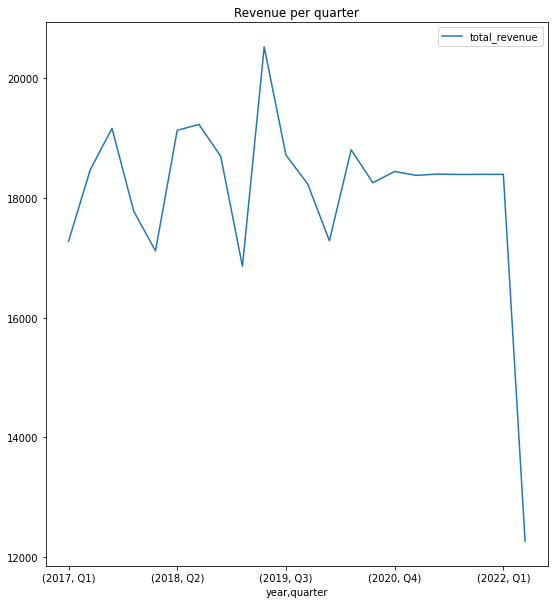

In [57]:
#graphing
%matplotlib inline
mod_ts.groupby(['year','quarter']).agg(total_revenue=('total_revenue', sum)).plot(figsize=(9, 10), title= "Revenue per quarter")

In [42]:
#adding in column combining year and quarter
mod_ts["period"] = mod_ts["year"].astype(str) + ", " + mod_ts["quarter"]
mod_ts.dtypes

t_date            object
year               int32
quarter           object
total_revenue    float64
period            object
dtype: object

In [43]:
mod_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   t_date         65 non-null     object 
 1   year           65 non-null     int32  
 2   quarter        65 non-null     object 
 3   total_revenue  65 non-null     float64
 4   period         65 non-null     object 
dtypes: float64(1), int32(1), object(3)
memory usage: 2.4+ KB


In [21]:
print(mod_ts)

        t_date  year quarter  total_revenue    period
0   2017-01-01  2017      Q1        5287.93  2017, Q1
1   2017-02-01  2017      Q1        5690.26  2017, Q1
2   2017-03-01  2017      Q1        6295.21  2017, Q1
3   2017-04-01  2017      Q2        5804.32  2017, Q2
4   2017-05-01  2017      Q2        5461.15  2017, Q2
..         ...   ...     ...            ...       ...
60  2022-01-01  2022      Q1        6130.73  2022, Q1
61  2022-02-01  2022      Q1        6130.95  2022, Q1
62  2022-03-01  2022      Q1        6131.08  2022, Q1
63  2022-04-01  2022      Q2        6131.05  2022, Q2
64  2022-05-01  2022      Q2        6130.97  2022, Q2

[65 rows x 5 columns]


In [50]:
mod_ts.groupby(['period']).agg(total_revenue=('total_revenue', sum)).head(50)

,total_revenue
period,
"2017, Q1",17273.40
"2017, Q2",18471.75
"2017, Q3",19162.32
"2017, Q4",17776.35
"2018, Q1",17113.52
"2018, Q2",19130.20
"2018, Q3",19227.46
"2018, Q4",18696.13
"2019, Q1",16857.19


In [23]:
mod_ts.groupby(['year']).agg(total_revenue=('total_revenue', sum)).head(50)

,total_revenue
year,
2017,72683.82
2018,74167.31
2019,74330.87
2020,72782.09
2021,73559.25
2022,30654.78


In [24]:
#attempt 2 of graphing
temp_ts = mod_ts.groupby('period').agg(total_revenue=('total_revenue', sum)).reset_index()
data_temp = go.Scatter(x=temp_ts.period, y=temp_ts.total_revenue,
                      mode="lines+markers+text",
                        name="Revenue per quarter",
                        text=["17.2k", "18.4k", "19.1k", "17.7k", "17.1k", "19.1k"],
                        textposition="top left",
                      line=dict(color='darkcyan', width=3))
    
go.Figure(
    data=data_temp,
    layout = go.Layout(
        title ='Revenue trend per quarter',
        yaxis=dict(
         title='Revenue',
         showticklabels=False,
         #visible=False
        )
    )
).show(renderer = 'iframe')

In [25]:
# Adding revenue label
temp_year_ts = mod_ts.groupby('year').agg(total_revenue=('total_revenue', sum)).reset_index()
data_tempyear = go.Scatter(x=temp_year_ts.year, y=temp_year_ts.total_revenue,
                      mode="lines+markers+text",
                        name="Revenue trend",
                        text=["72.6k", "74.1k", "74.3k", "72.7k", "73.5k", "30.6k"],
                        textposition="top left",
                      line=dict(color='darkcyan', width=3))
    
go.Figure(
    data=data_tempyear,
    layout = go.Layout(
        title ='Yearly revenue trend',
        yaxis=dict(
         title='Revenue',
         showticklabels=True,
         #visible=False
        )
    )
).show(renderer = 'iframe')